In [2]:
import numpy as np
 
def PCA(X , num_components):
     
    X_meaned = X - np.mean(X , axis = 0)
    
    # finding Covariance matrix    
    cov_mat = np.cov(X_meaned , rowvar = False)
    
    # Decomposition to eigen value and eigen vectors     
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    # Sorting eigen value based on highest variance    
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    
    # PCA   
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced, eigenvector_subset

In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_reshape = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_reshape = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [4]:
a,b=PCA(x_train_reshape,2)

In [5]:
a.shape

(60000, 2)

In [6]:
b.shape

(784, 2)

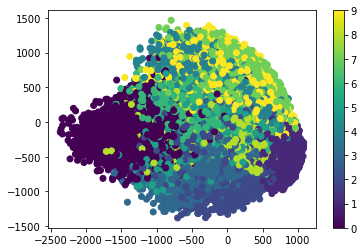

In [8]:
import matplotlib.pyplot as plt 
plt.scatter(a[:,0], a[:,1],c=y_train) 
plt.colorbar()
plt.show() 

In [56]:
pca_val,eigen_vec=PCA(x_train_reshape,10)

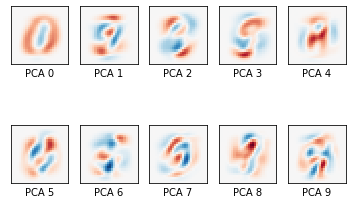

In [59]:
pca_val,eigen_vec=PCA(x_train_reshape,10)
scale = np.abs(eigen_vec).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(eigen_vec[:,i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('PCA %i' % i)

In [40]:
def PCA_test(X , x_test, num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
    X_test=x_test
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    X_test_reduced = np.dot(eigenvector_subset.transpose() , X_test.transpose() ).transpose()
    return X_reduced, eigenvector_subset, X_test_reduced

In [41]:
x_train_pca,z,x_test_pca=PCA_test(x_train_reshape,x_test_reshape,30)

In [42]:
x_train_pca

array([[ -123.93258866,  -312.67426202,   -24.51405176, ...,
         -170.1051332 ,  -125.51429047,   123.39969124],
       [-1011.71837587,  -294.85703827,   596.33956104, ...,
          -49.13214357,  -361.42759831,    85.72813141],
       [   51.84960805,   392.17315286,  -188.50974943, ...,
         -140.72213426,    13.1220257 ,   278.23233626],
       ...,
       [  178.0534496 ,   160.07821109,  -257.61308227, ...,
          157.21925286,  -176.11355608,   376.12404148],
       [ -130.60607208,    -5.59193642,   513.85867395, ...,
          277.41640126,  -118.76135219,   -47.45019719],
       [  173.43595244,   -24.71880226,   556.01889393, ...,
          177.90438115,   -50.32305668,   -38.68778554]])

In [43]:
x_test_pca

array([[ -424.52767511,   730.52221267,   179.27555647, ...,
           36.50246178,    13.32903438,   221.98308348],
       [ -777.49580647,  -972.86108625,    69.40485839, ...,
           11.6705793 ,    23.87617234,    67.20328199],
       [  189.22802356,  -448.11968613,   288.2967119 , ...,
           22.40575741,     5.70432287,   211.37773712],
       ...,
       [ -486.61108983,   579.5935838 ,   577.23105122, ...,
         -147.23358282,   112.77071842,    98.69534297],
       [ -442.77165257,  -125.88005996,   864.96017672, ...,
           73.82021952,  -280.7542396 ,    -2.96436781],
       [-1799.18815156,  -107.79121032,   928.23940422, ...,
          109.56744459,    48.51790348,  -102.8575549 ]])

In [44]:
class SoftmaxRegression:
    def __init__(self):
        pass
    
    def initialize_param(self,d):
        np.random.seed(1)
        params = {}
        params['w'] = np.random.randn(d,10)/np.sqrt(d)
        params['b'] = np.zeros((10,1))
        return params
    
    def softmax(self,Z):
        expZ = np.exp(Z - np.max(Z))
        return expZ / expZ.sum(axis=0, keepdims=True)

    def forward(self, params, X):
        w = params['w']
        b = params['b']
        Z = np.dot(w.T,X) + b
        A = self.softmax(Z)
        return A

    def compute_cost(self,A,Y):
        m = Y.shape[1]
        cost = (-1/m)*np.sum(Y * np.log(A + 1e-8))
        return cost

    def backprop(self,X, Y, A):
        m = Y.shape[1]
        dw = (1/m) * np.dot(X, (A - Y).T)
        db = (1/m) * np.sum(A - Y)
        return dw, db

    def optimise(self, params, X, Y, num_iterations, l_rate):
        costs = []
        for i in range(num_iterations):
            A = self.forward(params, X)
            cost = self.compute_cost(A, Y)
            dw, db = self.backprop(X, Y, A)

            params['w'] = params['w'] - l_rate * dw
            params['b'] = params['b'] - l_rate * db

            if i % 100 == 0:
                print("Cost after iteration %i : %f " %(i, cost))

            costs.append(cost)
        return params, costs

    def predict(self,params, X, Y):
        w = params['w']
        #print(w.shape,X.shape)
        probs = self.forward(params,X)
        y_hat = np.argmax(probs, axis=0)
        Y = np.argmax(Y, axis=0)
        conf_matrix=self.compute_confusion_matrix(Y, y_hat)
        print("label precision recall")
        for label in range(10):
            print(f"{label:5d} {self.precision(label, conf_matrix):9.3f} {self.recall(label, conf_matrix):6.3f}")

        accuracy = self.accuracy(conf_matrix)
        print("Test Accuracy: ",accuracy)        
        return conf_matrix

    def model(self,d, X_train, Y_train, num_interation, l_rate):
        params = self.initialize_param(d)
        params, costs = self.optimise(params, X_train, Y_train, num_interation, l_rate)
        return params, costs
    
    def compute_confusion_matrix(self,true, pred):
        K = len(np.unique(true)) # Number of classes 
        result = np.zeros((K, K))
        for i in range(len(true)):
            result[true[i]][pred[i]] += 1
        return result

    def precision(self,label, confusion_matrix):
        col = confusion_matrix[:, label]
        return confusion_matrix[label, label] / col.sum()

    def recall(self,label, confusion_matrix):
        row = confusion_matrix[label, :]
        return confusion_matrix[label, label] / row.sum()
    
    def accuracy(self,confusion_matrix):
        diagonal_sum = confusion_matrix.trace()
        sum_of_all_elements = confusion_matrix.sum()
        return diagonal_sum / sum_of_all_elements

In [45]:
Y_Train = np.zeros((len(y_train),10))
Y_Test = np.zeros((len(y_test),10))
for i in range(len(y_train)):
    Y_Train[i,y_train[i]] = 1
for i in range(len(y_test)):
    Y_Test[i,y_test[i]] = 1
x_train_pca = x_train_pca.astype('float32') / 255.
x_test_pca = x_test_pca.astype('float32') / 255.


Y_Train=Y_Train.T
Y_Test=Y_Test.T
x_train_pca=x_train_pca.T
x_test_pca=x_test_pca.T

Cost after iteration 0 : 2.796306 
Cost after iteration 100 : 0.662041 
Cost after iteration 200 : 0.541505 
Cost after iteration 300 : 0.496223 
Cost after iteration 400 : 0.472180 
Cost after iteration 500 : 0.457223 
Cost after iteration 600 : 0.447026 
Cost after iteration 700 : 0.439647 
Cost after iteration 800 : 0.434079 
Cost after iteration 900 : 0.429744 
time elapsed:  22.573315143585205
label precision recall
    0     0.933  0.933
    1     1.000  0.271
    2     0.912  0.751
    3     0.848  0.749
    4     0.924  0.747
    5     0.993  0.155
    6     0.945  0.839
    7     0.987  0.715
    8     0.269  0.988
    9     0.823  0.710
Test Accuracy:  0.6842
Confusion Matrix:  [[914.   0.   4.   4.   0.   0.   8.   0.  49.   1.]
 [  0. 308.   3.   2.   0.   0.   2.   0. 820.   0.]
 [  9.   0. 775.  22.   8.   0.  15.   5. 192.   6.]
 [  3.   0.  10. 756.   0.   1.   3.   1. 233.   3.]
 [  2.   0.   4.   1. 734.   0.   6.   0. 205.  30.]
 [ 16.   0.   5.  79.   3. 138.  12.  

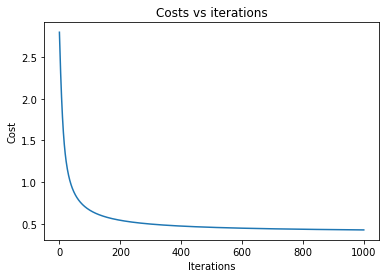

In [51]:
import time
regressor = SoftmaxRegression()
start= time.time()
params, costs = regressor.model(x_train_pca.shape[0], x_train_pca, Y_Train, 1000, .1)
end= time.time()
time_taken= end-start
print('time elapsed: ',time_taken)
plt.plot(range(len(costs)),costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Costs vs iterations")
print("Confusion Matrix: ",regressor.predict(params, x_test_pca, Y_Test))

In [50]:
time_taken

25.866801977157593

Cost after iteration 0 : 2.436488 
Cost after iteration 100 : 0.614079 
Cost after iteration 200 : 0.493491 
Cost after iteration 300 : 0.444587 
Cost after iteration 400 : 0.416616 
Cost after iteration 500 : 0.397954 
Cost after iteration 600 : 0.384356 
Cost after iteration 700 : 0.373870 
Cost after iteration 800 : 0.365458 
Cost after iteration 900 : 0.358509 
time elapsed:  469.3757948875427
label precision recall
    0     0.936  0.979
    1     0.956  0.973
    2     0.921  0.870
    3     0.892  0.896
    4     0.897  0.925
    5     0.888  0.827
    6     0.928  0.939
    7     0.915  0.897
    8     0.849  0.869
    9     0.880  0.883
Test Accuracy:  0.9071
Confusion Matrix:  [[9.590e+02 0.000e+00 2.000e+00 2.000e+00 1.000e+00 4.000e+00 8.000e+00
  1.000e+00 3.000e+00 0.000e+00]
 [0.000e+00 1.104e+03 2.000e+00 4.000e+00 1.000e+00 2.000e+00 4.000e+00
  1.000e+00 1.700e+01 0.000e+00]
 [1.000e+01 7.000e+00 8.980e+02 1.600e+01 1.500e+01 1.000e+00 1.500e+01
  1.800e+01 4.300e+01 

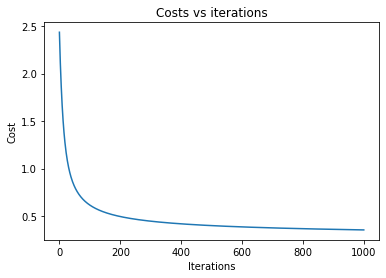

In [52]:
# Test on raw data
import time

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_reshape = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_reshape = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
X_TRAIN=np.array(x_train_reshape)
X_TEST=np.array(x_test_reshape)
XX_train = X_TRAIN.astype('float32') / 255.
XX_test = X_TEST.astype('float32') / 255.

# making suitable for regression
Y_Train = np.zeros((len(y_train),10))
Y_Test = np.zeros((len(y_test),10))
for i in range(len(y_train)):
    Y_Train[i,y_train[i]] = 1
for i in range(len(y_test)):
    Y_Test[i,y_test[i]] = 1
    
XX_Train = XX_train.T
XX_Test =XX_test.T
Y_Train=Y_Train.T
Y_Test=Y_Test.T

regressor = SoftmaxRegression()
start= time.time()
params, costs = regressor.model(XX_Train.shape[0], XX_Train, Y_Train, 1000, .1)
end= time.time()
time_taken= end-start
print('time elapsed: ',time_taken)
plt.plot(range(len(costs)),costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Costs vs iterations")
print("Confusion Matrix: ",regressor.predict(params, XX_Test, Y_Test))

Automatically created module for IPython interactive environment
Sparsity with L1 penalty: 78.75%
Test score with L1 penalty: 0.8343
Example run in 32.831 s


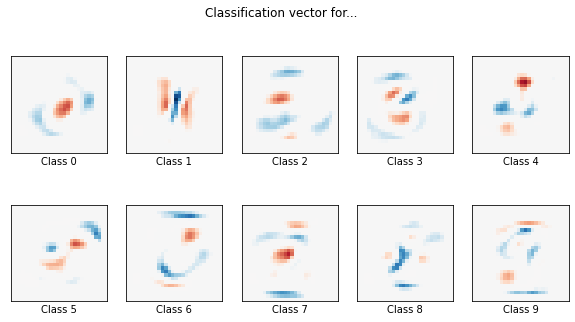

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)

# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

# Turn down for faster convergence
t0 = time.time()
train_samples = 60000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(
    C=50. / train_samples, penalty='l1', solver='saga', tol=0.1
)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()